# Loan Prediction 03 - Training and Validation of first models

We propose two models of different nature to predict the Loan approval: Logistic Regression and Random Forest.

- Forest Based Algorithms: Flexibility treating variance in data; Can handle categorical and numerical data; Can handle missing data; Can overcome multicollinearity;
- Regressors: can show direct relationship between inputs and output; Variable Selection;

Now, let us train and validate our models with the preprocessed dataset

In [63]:
import sys
sys.path.append('utils')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
plt.style.use('seaborn')


from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import metrics_utils 
import model_utils

In [11]:
df_import = pd.read_csv('dataset/train_loan_preprocessed.csv')
df_import.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Base_Loan_Installment,Remaining_Income
0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0,359.111111,0.941042
1,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1.0,185.166667,0.938278
2,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1.0,336.666667,0.931863
3,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1.0,395.583333,0.934069
4,1.0,1.0,2.0,0.0,1.0,5417,4196.0,267.0,360.0,1.0,2.0,1.0,749.083333,0.922076
5,1.0,1.0,0.0,1.0,0.0,2333,1516.0,95.0,360.0,1.0,2.0,1.0,266.527778,0.930754
6,1.0,1.0,3.0,0.0,0.0,3036,2504.0,158.0,360.0,0.0,1.0,0.0,443.277778,0.919986
7,1.0,1.0,2.0,0.0,0.0,4006,1526.0,168.0,360.0,1.0,2.0,1.0,471.333333,0.914799
8,1.0,1.0,1.0,0.0,0.0,12841,10968.0,349.0,360.0,1.0,1.0,0.0,979.138889,0.958875
9,1.0,1.0,2.0,0.0,0.0,3200,700.0,70.0,360.0,1.0,2.0,1.0,196.388889,0.949644


In [64]:
columns_x = df_import.drop(columns=['Loan_Status']).columns
column_y = ['Loan_Status']

X_train, X_validation, y_train, y_validation = train_test_split(
    df_import[columns_x], df_import[column_y],  test_size=0.20, random_state=42)

In [65]:
scaler = StandardScaler()
scaler.fit(df_import[columns_x])

X_train_norm = pd.DataFrame(data=scaler.transform(X_train),columns=X_train.columns)
X_validation_norm = pd.DataFrame(data=scaler.transform(X_validation),columns=X_train.columns)

In [66]:
X_train_norm.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Base_Loan_Installment,Remaining_Income
count,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000
mean,0.019404,-0.021289,-0.012237,0.043919,0.053910,0.031983,-0.039826,-0.018293,-0.032197,-0.004593,0.006880,0.010200,-0.029096
std,0.984864,1.007289,1.001332,1.031904,1.057693,1.096577,0.867680,0.990346,1.045913,1.005445,1.016563,1.054961,1.108445
min,-2.121320,-1.339625,-0.765502,-0.507846,-0.385861,-0.863538,-0.533148,-1.578442,-4.741258,-2.286682,-1.302350,-1.035235,-17.256252
25%,0.471405,-1.339625,-0.765502,-0.507846,-0.385861,-0.414145,-0.533148,-0.558389,0.279850,0.437315,-1.302350,-0.489933,-0.092098
50%,0.471405,0.746478,-0.765502,-0.507846,-0.385861,-0.250774,-0.215871,-0.214275,0.279850,0.437315,-0.014941,-0.254127,0.097189
75%,0.471405,0.746478,0.218987,-0.507846,-0.385861,0.070857,0.166281,0.277317,0.279850,0.437315,1.272468,0.136427,0.298082
max,0.471405,0.746478,2.187964,1.969101,2.591605,12.464935,10.388209,5.586507,2.139519,0.437315,1.272468,10.195027,1.019676


In [67]:
X_validation_norm.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Base_Loan_Installment,Remaining_Income
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,-0.077057,0.084541,0.048595,-0.174411,-0.214084,-0.127010,0.158153,0.072644,0.127857,0.018238,-0.027320,-0.040506,0.115545
std,1.063995,0.975633,1.002882,0.849506,0.697590,0.434856,1.405820,1.043842,0.789316,0.987581,0.940678,0.752043,0.296552
min,-2.121320,-1.339625,-0.765502,-0.507846,-0.385861,-0.819686,-0.533148,-1.676760,-2.509654,-2.286682,-1.302350,-1.160506,-0.991383
25%,0.471405,-1.339625,-0.765502,-0.507846,-0.385861,-0.401945,-0.533148,-0.460071,0.279850,0.437315,-1.302350,-0.425455,-0.077674
50%,0.471405,0.746478,-0.765502,-0.507846,-0.385861,-0.274019,0.035562,-0.195840,0.279850,0.437315,-0.014941,-0.257812,0.106906
75%,0.471405,0.746478,1.203476,-0.507846,-0.385861,0.070939,0.273762,0.347983,0.279850,0.437315,1.272468,0.115057,0.311819
max,0.471405,0.746478,2.187964,1.969101,2.591605,1.515805,12.915449,4.308369,2.139519,0.437315,1.272468,3.931429,0.999317


In [68]:
# def plot precision_recall_curve(model, model_name,X_test,y_test):
#     lr_probs = model.predict_proba(X_test)
#     lr_probs = lr_probs[:, 1]
#     yhat = model.predict(X_test)
#     lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
#     lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)
#     print(model_name,': f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
#     no_skill = len(y_test[y_test==1]) / len(y_test)
#     pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
#     pyplot.plot(lr_recall, lr_precision, marker='.', label=model_name)
#     pyplot.xlabel('Recall')
#     pyplot.ylabel('Precision')
#     pyplot.legend()
#     pyplot.show()

### Logistic Regression Classifier

In [69]:
lr = LogisticRegression(random_state=0,solver='lbfgs');
lr.fit(X_train_norm.values,y_train.values.ravel());
df_result = model_utils.predict(lr,X_validation_norm,y_validation);

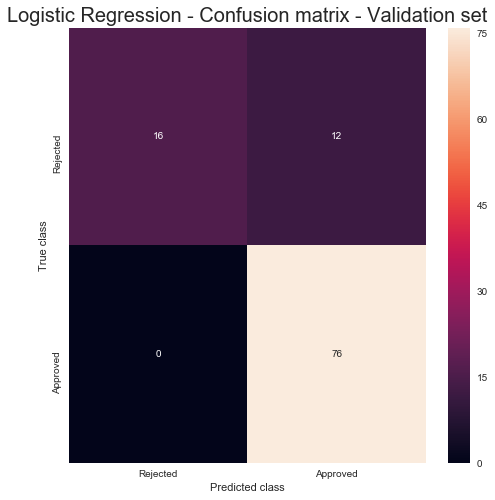

              precision    recall  f1-score   support

    Rejected       1.00      0.57      0.73        28
    Approved       0.86      1.00      0.93        76

    accuracy                           0.88       104
   macro avg       0.93      0.79      0.83       104
weighted avg       0.90      0.88      0.87       104

No Skill: ROC AUC=0.500
Logistic Regression : ROC AUC=0.849


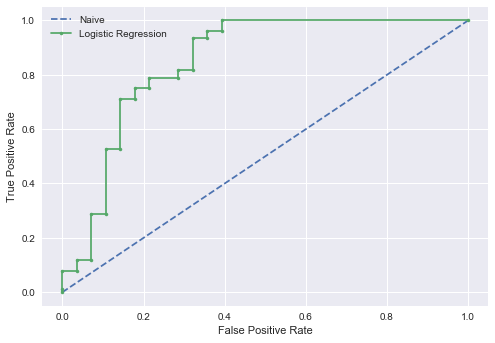

In [71]:
tn, fp, fn, tp = metrics_utils.plot_confusion_matrix(df_result,'Logistic Regression')
metrics_utils.show_performance(df_result)
metrics_utils.plot_ROC(model = lr,model_name = 'Logistic Regression',X_test = X_validation_norm, y_test = y_validation)

### Ridge Regressor Classification

In [72]:
ridge = RidgeClassifier(random_state=0);
ridge.fit(X_train_norm.values,y_train.values.ravel());
df_result = model_utils.predict(ridge,X_validation_norm,y_validation);

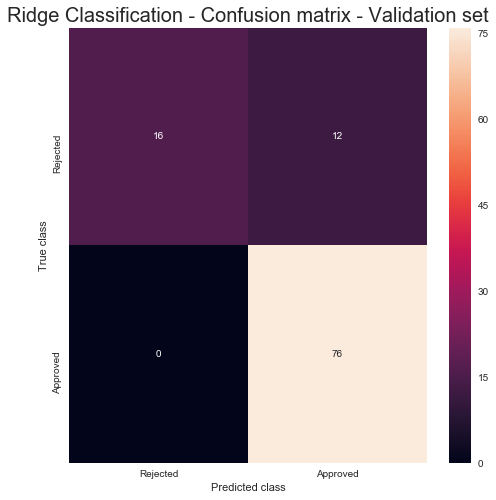

              precision    recall  f1-score   support

    Rejected       1.00      0.57      0.73        28
    Approved       0.86      1.00      0.93        76

    accuracy                           0.88       104
   macro avg       0.93      0.79      0.83       104
weighted avg       0.90      0.88      0.87       104



In [73]:
tn, fp, fn, tp = metrics_utils.plot_confusion_matrix(df_result,'Ridge Classification')
metrics_utils.show_performance(df_result)
# metrics_utils.plot_ROC(model = ridge,model_name = 'Ridge Classification',X_test = X_validation_norm, y_test = y_validation)

### Random Forest Classifier

In [109]:
rfc = RandomForestClassifier(
            n_estimators = 500,
            min_samples_split = 2,
            max_depth = 13,
            random_state = 0)
rfc.fit(X_train_norm.values,y_train.values.ravel())
df_result = model_utils.predict(rfc,X_validation_norm,y_validation)

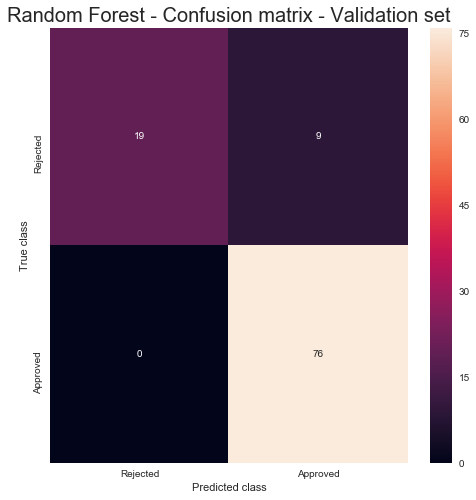

              precision    recall  f1-score   support

    Rejected       1.00      0.68      0.81        28
    Approved       0.89      1.00      0.94        76

    accuracy                           0.91       104
   macro avg       0.95      0.84      0.88       104
weighted avg       0.92      0.91      0.91       104

No Skill: ROC AUC=0.500
Random Forest : ROC AUC=0.931


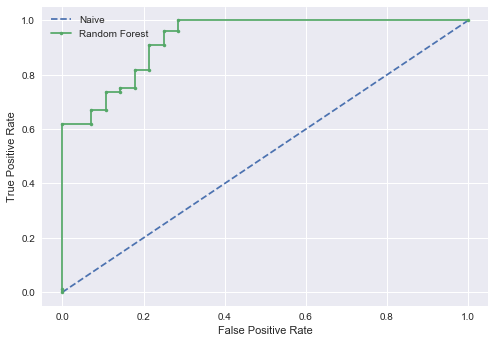

In [110]:
tn, fp, fn, tp = metrics_utils.plot_confusion_matrix(df_result,title = 'Random Forest')
metrics_utils.show_performance(df_result)
metrics_utils.plot_ROC(model = rfc,model_name = 'Random Forest',X_test = X_validation_norm, y_test = y_validation)

### Gradient Boosting

In [117]:
gboost = GradientBoostingClassifier(
            n_estimators = 200,
            min_samples_split = 3,
            random_state = 0)
gboost.fit(X_train_norm.values,y_train.values.ravel())
df_result = model_utils.predict(gboost,X_validation_norm,y_validation)

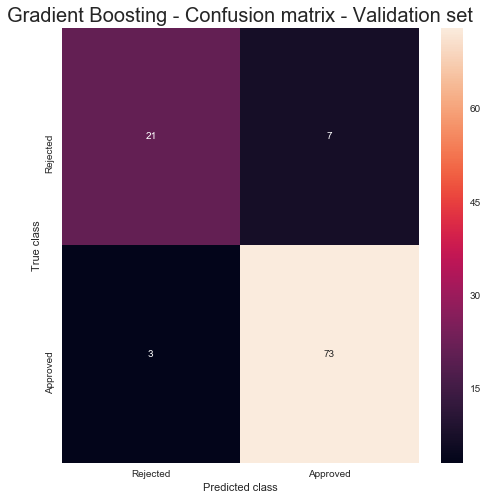

              precision    recall  f1-score   support

    Rejected       0.88      0.75      0.81        28
    Approved       0.91      0.96      0.94        76

    accuracy                           0.90       104
   macro avg       0.89      0.86      0.87       104
weighted avg       0.90      0.90      0.90       104

No Skill: ROC AUC=0.500
Gradient Boosting : ROC AUC=0.890


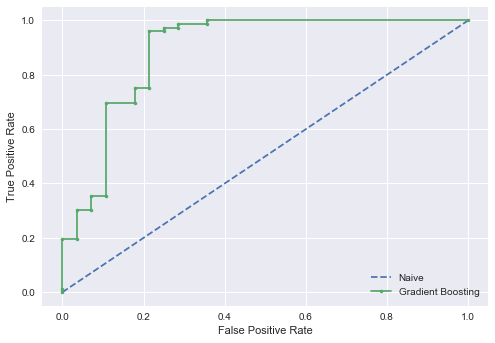

In [118]:
tn, fp, fn, tp = metrics_utils.plot_confusion_matrix(df_result,title = 'Gradient Boosting')
metrics_utils.show_performance(df_result)
metrics_utils.plot_ROC(model = gboost,model_name = 'Gradient Boosting',X_test = X_validation_norm, y_test = y_validation)

In [ ]:
#TODO: Execute a small grid search to tune models
#TODO: Execute grid search with CROSS VALIDATION
#TODO: Apply a RFE wrapper to check for variable selection
#TODO: Apply other models

### Conclusion

The best performing classifiers were the Random Forest and Gradient Boosting. 

We can point out the Random Forest had a more sensity outcome than the Gradient Boosting. 

The regression models had slightly inferior performance, but still had a good performance.

Let us see (in the next notebooks) how these models will perform when the missing data is filled by a Random Forest algorithm.